# Analysing Performance of Stocks using Causal Discovery

## Setup

Import the datasets:

In [3]:
%%capture


## Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_dir = "C:/Users/diego/iCloudDrive/Documents/MBZUAI Sem/Semester 2/ML703 Probabilistic and Statistical Inference/Project/JN/Datasets/"

company = pd.read_csv(data_dir + "Company.csv")
companyValues = pd.read_csv(data_dir + "CompanyValues.csv")
companyTweet = pd.read_csv(data_dir + "Company_Tweet.csv")
tweet = pd.read_csv(data_dir + "Tweet.csv")
tweet = tweet.merge(companyTweet, on="tweet_id", how='inner')

In [4]:
companyValues.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [56]:
companyValuesApple = companyValues[companyValues.ticker_symbol == 'AAPL']
tweetApple = tweet[tweet.ticker_symbol == 'AAPL']

In [35]:
companyValuesApple.shape

(3085, 7)

In [36]:
tweetApple.shape

(1425013, 8)

In [57]:
from datetime import datetime, timezone
from zoneinfo import ZoneInfo

tweetApple['post_date'] =  pd.to_datetime(tweetApple['post_date'], unit='s', utc=True)
tweetApple['post_datetime'] = tweetApple['post_date'].dt.tz_convert('Asia/Qatar')
tweetApple['date'] = tweetApple['post_datetime'].dt.date

tweetApple[tweetApple.writer == "btcgemini"]

C:\Users\diego\AppData\Local\Temp/ipykernel_36544/969402371.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetApple['post_date'] =  pd.to_datetime(tweetApple['post_date'], unit='s', utc=True)
C:\Users\diego\AppData\Local\Temp/ipykernel_36544/969402371.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetApple['post_datetime'] = tweetApple['post_date'].dt.tz_convert('Asia/Qatar')
C:\Users\diego\AppData\Local\Temp/ipykernel_36544/969402371.py:6: SettingWithCopyWarning: 
A value is trying to be set 

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,post_datetime,date
24,550447574285418497,btcgemini,2015-01-01 00:25:03+00:00,We searched through hundreds of charts and fou...,0,0,0,AAPL,2015-01-01 03:25:03+03:00,2015-01-01
110446,567684786831892481,btcgemini,2015-02-17 13:59:34+00:00,What exactly is an Apple Watch for? $AAPL http...,0,0,0,AAPL,2015-02-17 16:59:34+03:00,2015-02-17
142197,572295414998691840,btcgemini,2015-03-02 07:20:34+00:00,Here’s a list of the stocks hedge funds loved ...,1,0,2,AAPL,2015-03-02 10:20:34+03:00,2015-03-02
196808,579163548422537216,btcgemini,2015-03-21 06:12:04+00:00,"In the last 9 minutes of trading, one $AAPL dr...",1,1,1,AAPL,2015-03-21 09:12:04+03:00,2015-03-21


In [58]:
tweetAppleMetrics = tweetApple[['date', 'comment_num', 'retweet_num', 'like_num']]
tweetAppleMetrics = tweetAppleMetrics.groupby(["date"]).sum()
tweetAppleMetrics

,comment_num,retweet_num,like_num
date,,,
2015-01-01,17,968,227
2015-01-02,128,2102,562
2015-01-03,31,103,192
2015-01-04,52,328,323
2015-01-05,139,392,554
...,...,...,...
2019-12-28,127,545,1579
2019-12-29,74,307,528
2019-12-30,271,725,1821


In [69]:
tweetAppleMetrics2019 = tweetAppleMetrics[(tweetAppleMetrics.index >= pd.to_datetime("2019/01/01")) & (tweetAppleMetrics.index <= pd.to_datetime("2019/12/31"))]
tweetAppleMetrics2019

C:\Users\diego\anaconda3\envs\ml_703\lib\site-packages\pandas\core\ops\array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior.  In a future version these will be considered non-comparable.Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


,comment_num,retweet_num,like_num
date,,,
2019-01-01,61,163,539
2019-01-02,15,9,135
2019-01-03,4292,5215,26762
2019-01-04,1202,1396,5969
2019-01-05,239,294,1358
...,...,...,...
2019-12-27,196,183,1225
2019-12-28,127,545,1579
2019-12-29,74,307,528


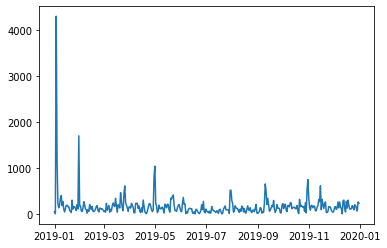

In [76]:
plt.plot(tweetAppleMetrics2019.comment_num)

In [71]:
companyValuesApple['date'] = pd.to_datetime(companyValuesApple['day_date']).dt.date
companyValuesAppleMetrics = companyValuesApple[['date', 'close_value', 'volume', 'open_value', 'high_value', 'low_value']]
companyValuesAppleMetrics = companyValuesAppleMetrics.groupby(['date']).sum()
companyValuesAppleMetrics2019 = companyValuesAppleMetrics[(companyValuesAppleMetrics.index >= pd.to_datetime("2019/01/01")) & (companyValuesAppleMetrics.index <= pd.to_datetime("2019/12/31"))]
companyValuesAppleMetrics2019

C:\Users\diego\AppData\Local\Temp/ipykernel_36544/3448867007.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  companyValuesApple['date'] = pd.to_datetime(companyValuesApple['day_date']).dt.date


,close_value,volume,open_value,high_value,low_value
date,,,,,
2019-01-01,157.74,34499390,158.53,159.3600,156.48
2019-01-02,157.92,35637070,154.89,158.8500,154.23
2019-01-03,142.19,91106840,143.98,145.7200,142.00
2019-01-04,148.26,57423650,144.53,148.5499,143.80
2019-01-05,148.26,57423650,144.53,148.5499,143.80
...,...,...,...,...,...
2019-12-27,289.80,36592940,291.12,293.9700,288.12
2019-12-28,289.80,36592940,291.12,293.9700,288.12
2019-12-29,289.80,36592940,291.12,293.9700,288.12


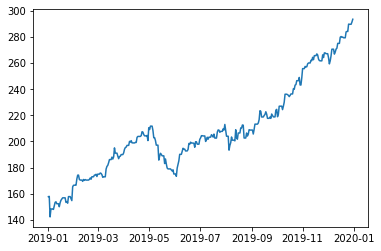

In [72]:
plt.plot(companyValuesAppleMetrics2019.close_value)

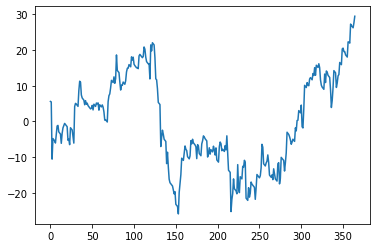

In [89]:
from sklearn.linear_model import LinearRegression

X = [i for i in range(0, len(companyValuesAppleMetrics2019.close_value))]
X = np.reshape(X, (len(X), 1))
y = companyValuesAppleMetrics2019.close_value

lr_model = LinearRegression()
lr_model.fit(X, y)

trend = lr_model.predict(X)

detrended = [y[i]-trend[i] for i in range(0, len(companyValuesAppleMetrics2019.close_value))]

plt.plot(detrended)

## Causal Inference